# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [159]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[62, 40, 57, ...,  2, 92, 14],
       [ 0, 86,  3, ..., 59, 34, 78],
       [72, 21, 93, ..., 23, 84, 87],
       ...,
       [42, 38, 26, ..., 70, 58, 44],
       [91, 25, 37, ..., 30, 51, 93],
       [20, 37, 71, ..., 41, 78, 65]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [160]:
B = np.transpose(np.random.permutation(np.transpose(A)))
B

array([[ 5, 82, 58, ..., 83, 81,  2],
       [77,  9, 40, ..., 67, 72, 59],
       [79, 17, 27, ..., 59, 96, 23],
       ...,
       [73, 76, 85, ..., 38, 52, 70],
       [43, 88, 19, ..., 57, 96, 30],
       [58, 70, 92, ..., 17, 16, 41]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [161]:
C = A[A[:,::2].sum(axis=1) > A[:,1::2].sum(axis=1).mean()]
C

array([[62, 40, 57, ...,  2, 92, 14],
       [72, 21, 93, ..., 23, 84, 87],
       [78, 52, 26, ...,  4, 15, 21],
       ...,
       [42, 38, 26, ..., 70, 58, 44],
       [91, 25, 37, ..., 30, 51, 93],
       [20, 37, 71, ..., 41, 78, 65]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [162]:
i = np.argmax(np.max(A, axis=1) - np.min(A, axis=1))
i

6

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [163]:
D = np.argsort(A.reshape(1, len(A)*len(A[0]))).reshape(len(A),len(A[0])) + 1
D

array([[8603, 8600, 3112, ..., 1672, 9153, 2427],
       [9152, 7639,  505, ...,  975, 7356,  909],
       [4949, 2863, 8463, ..., 5480,   59, 7516],
       ...,
       [6729, 4935,  393, ..., 9294, 9963, 2007],
       [5762, 9985, 7534, ..., 3806, 8411, 6827],
       [2437, 5650,  736, ..., 3462, 9801, 1345]])

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массив, в каждой строке которого максимальный элемент равен $1$, минимальный - $0$. 

In [197]:
A_min = np.tile(A.min(axis=1).reshape((-1, 1)), (1, A.shape[1]))
A_max = np.tile(A.max(axis=1).reshape((-1, 1)), (1, A.shape[1]))
E = (A - A_min) / (A_max - A_min)
E

array([[0.6185567 , 0.39175258, 0.56701031, ..., 0.        , 0.92783505,
        0.12371134],
       [0.        , 0.87755102, 0.03061224, ..., 0.60204082, 0.34693878,
        0.79591837],
       [0.72093023, 0.12790698, 0.96511628, ..., 0.15116279, 0.86046512,
        0.89534884],
       ...,
       [0.39784946, 0.35483871, 0.22580645, ..., 0.69892473, 0.56989247,
        0.41935484],
       [0.92553191, 0.22340426, 0.35106383, ..., 0.27659574, 0.5       ,
        0.94680851],
       [0.18556701, 0.36082474, 0.71134021, ..., 0.40206186, 0.78350515,
        0.64948454]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [165]:
c = np.arange(1, 11).reshape((-1, 1, 1))   # shape: (10, 1, 1)
A * c   # shape: (200, 50) * (10, 1, 1) = (1, 200, 50) * (10, 1, 1) = (10, 200, 50)

array([[[ 62,  40,  57, ...,   2,  92,  14],
        [  0,  86,   3, ...,  59,  34,  78],
        [ 72,  21,  93, ...,  23,  84,  87],
        ...,
        [ 42,  38,  26, ...,  70,  58,  44],
        [ 91,  25,  37, ...,  30,  51,  93],
        [ 20,  37,  71, ...,  41,  78,  65]],

       [[124,  80, 114, ...,   4, 184,  28],
        [  0, 172,   6, ..., 118,  68, 156],
        [144,  42, 186, ...,  46, 168, 174],
        ...,
        [ 84,  76,  52, ..., 140, 116,  88],
        [182,  50,  74, ...,  60, 102, 186],
        [ 40,  74, 142, ...,  82, 156, 130]],

       [[186, 120, 171, ...,   6, 276,  42],
        [  0, 258,   9, ..., 177, 102, 234],
        [216,  63, 279, ...,  69, 252, 261],
        ...,
        [126, 114,  78, ..., 210, 174, 132],
        [273,  75, 111, ...,  90, 153, 279],
        [ 60, 111, 213, ..., 123, 234, 195]],

       ...,

       [[496, 320, 456, ...,  16, 736, 112],
        [  0, 688,  24, ..., 472, 272, 624],
        [576, 168, 744, ..., 184, 672, 696

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [166]:
a1 = A[:,1::2]
a1
a2 = A[:,0::2]
F = np.concatenate((a2, a1), axis=1)
F

array([[62, 57, 66, ..., 58,  2, 14],
       [ 0,  3,  7, ..., 40, 59, 78],
       [72, 93, 14, ..., 27, 23, 87],
       ...,
       [42, 26, 20, ..., 85, 70, 44],
       [91, 37, 52, ..., 19, 30, 93],
       [20, 71, 19, ..., 92, 41, 65]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [167]:
len(A[np.all(A > 5, axis=1)])

7

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [168]:
np.mean(np.split(A, 10), axis=0)

array([[50.2, 33.5, 50.7, 48.5, 59.4, 49.4, 55. , 44.2, 54.8, 48.5, 49.5,
        40. , 62.6, 28.4, 30.8, 60.1, 71.7, 49.7, 60.7, 60.3, 49.5, 54.8,
        46.7, 39.3, 52.6, 46.6, 44.9, 38.5, 53.8, 63. , 37.9, 73.3, 35.4,
        51.1, 52.6, 52.3, 53.3, 38.3, 49. , 39.2, 47.6, 59.4, 56.3, 43. ,
        55.3, 41. , 45.5, 45.6, 49.5, 40.4],
       [54. , 47.9, 62.5, 61.1, 54.2, 43.8, 34. , 47.9, 59.4, 46.3, 68.6,
        50.1, 48.9, 53.1, 61.9, 37. , 39. , 41.3, 61.7, 54.6, 56.5, 38.8,
        61.4, 60.5, 54.6, 70. , 44. , 40.5, 59.6, 41.3, 58.9, 38.6, 48.2,
        44.8, 52.1, 62.6, 73. , 63. , 60. , 45.1, 51.1, 44.3, 49.5, 52.1,
        47.7, 57.3, 46.3, 62.6, 56. , 40.1],
       [41.9, 41.4, 53. , 48.5, 52. , 46.4, 52.6, 58.4, 49.1, 36.6, 62. ,
        48.2, 38.6, 48.3, 39.2, 42.7, 48.3, 36.6, 62.3, 43.7, 59.6, 52.3,
        60.5, 42. , 38.7, 36.1, 60.7, 54.7, 74.8, 55.5, 44.1, 48.5, 59.2,
        57.4, 57.2, 61.4, 57.1, 48.9, 52.3, 42. , 58.4, 47.3, 47.4, 45.1,
        48.8, 41.2, 42

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [169]:
_, ind = np.unique(A, return_index=True)
J = A.reshape((1, len(A) * len(A[0])))
J[0][np.sort(ind)]  

array([62, 40, 57, 38, 66, 95, 44, 11, 74, 81, 99, 53, 15, 21, 46, 31, 49,
       51, 60, 34,  5, 86,  7, 13, 88, 41, 77, 76, 27, 52, 36, 84,  8, 82,
       83, 18, 67, 58,  2, 92, 14,  0,  3, 55, 24, 26, 61,  1, 72, 32, 47,
       33, 29, 10, 70, 73, 98, 12, 96, 16, 78, 50,  9, 25, 59, 93, 43, 65,
       89, 35, 79, 71, 64, 22, 90, 17, 23, 87, 48, 37, 28, 68, 30, 42,  4,
       91,  6, 45, 97, 69, 39, 19, 54, 80, 94, 63, 56, 75, 85, 20])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [170]:
np.linalg.norm(A - np.mean(A, axis=0), axis=1)

array([199.45738135, 201.87517672, 192.5092127 , 188.51725909,
       216.67078016, 222.47365456, 188.46861005, 211.10967997,
       209.59992122, 224.1657132 , 216.76770279, 222.71061262,
       206.44698345, 234.50022809, 212.07024066, 201.34891848,
       218.75963287, 185.36805813, 235.97365738, 216.22883012,
       198.06755659, 209.64714874, 212.73919943, 214.04083016,
       198.19618305, 200.32253237, 204.89489251, 203.21136035,
       221.92563388, 186.27978144, 211.05410912, 185.26933631,
       213.71732961, 216.1926617 , 190.80316291, 197.12972119,
       217.33988814, 216.67428776, 198.45227884, 194.63886296,
       205.48685353, 212.04159256, 190.29623479, 177.0185498 ,
       190.52261539, 200.50428169, 192.97366912, 217.30413474,
       228.61351004, 207.79631126, 204.54301986, 192.77701361,
       192.30748029, 208.6523831 , 217.11049485, 210.3980679 ,
       191.37310933, 205.69483945, 181.44144228, 201.2293144 ,
       237.95973814, 204.09122219, 204.09391705, 216.17

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [171]:
np.where(A < 50, 2 * A, 3 * A)

array([[186,  80, 171, ...,   4, 276,  28],
       [  0, 258,   6, ..., 177,  68, 234],
       [216,  42, 279, ...,  46, 252, 261],
       ...,
       [ 84,  76,  52, ..., 210, 174,  88],
       [273,  50,  74, ...,  60, 153, 279],
       [ 40,  74, 213, ...,  82, 234, 195]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [172]:
def moving_average(arr: np.ndarray, window_size: int) -> np.ndarray:
    return np.convolve(arr[0], np.ones(window_size) / window_size, mode='valid') 
    
V = A.reshape((1, len(A) * len(A[0])))
V3 = moving_average(V, 3)
V5 = moving_average(V, 5)
V10 = moving_average(V, 10)

V5 = np.concatenate((V5,  np.zeros(V3.shape[0] - V5.shape[0])))
V10 = np.concatenate((V10,  np.zeros(V3.shape[0] - V10.shape[0])))
V3 + V5 + V10

array([162.4       , 164.7       , 175.46666667, ..., 131.53333333,
        59.66666667,  61.33333333])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

Optimization terminated successfully.
         Current function value: -4.882074
         Iterations: 6
         Function evaluations: 16
         Gradient evaluations: 8


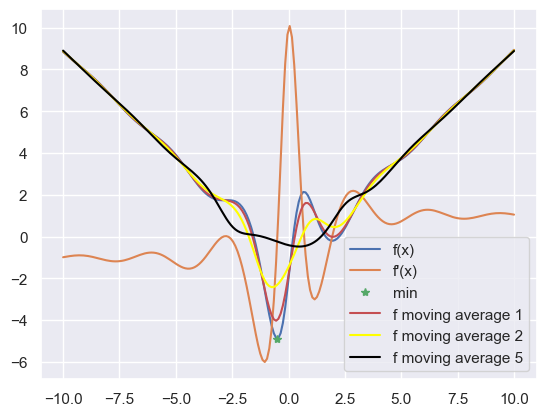

In [173]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from scipy.misc import derivative
from typing import Union, Callable


def mov_avg(func: Callable[[np.ndarray], np.ndarray], x: np.ndarray, window: float) -> np.ndarray:
    args = np.linspace(x - window / 2, x + window / 2, window * 100)
    return func(args).mean(axis=0)

def f(x: np.ndarray) -> np.ndarray:
    return (5 * np.sin(2 * x) - np.cos(x) ** 2 - 1 + np.abs(x ** 3) - x ** 2) / (x ** 2 + 1)

def df(f: Callable[[np.ndarray], np.ndarray], x: np.ndarray) -> np.ndarray:
    return derivative(f, x, dx=1e-6)


x = np.linspace(-10, 10, 200)  # (-10, 10, 1000)
y = f(x) ## (5 * np.sin(2 * x) - np.cos(x) ** 2 - 1 + np.abs(x ** 3) - x ** 2) / (x ** 2 + 1)
dy = df(f, x)

plt.plot(x, y, label='f(x)')
plt.plot(x, dy, label='f\'(x)')

min_f_p = scipy.optimize.fmin_bfgs(f, 0, full_output=True)
x_min, y_min = min_f_p[0][0], min_f_p[1]
plt.plot(x_min, y_min, '*', label='min ') 

m_a_1 = mov_avg(f, x, 1)
m_a_2 = mov_avg(f, x, 2)
m_a_5 = mov_avg(f, x, 5)

# print(m_a_1.shape, m_a_2.shape, m_a_5.shape)

plt.plot(x, m_a_1, label='f moving average 1') 
plt.plot(x, m_a_2, label='f moving average 2', color='yellow')  # x[:len(m_a_2)]
plt.plot(x, m_a_5, label='f moving average 5', color = 'black')  # x[(len(x) - len(m_a_5)) // 2 : len(x) // 2 + len(m_a_5) // 2]

plt.legend()
plt.show()

# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [174]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1    
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[3, 0, 0, 3, 3]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [175]:
def sample_np(x: np.ndarray, c: int) -> np.ndarray:
    assert len(x) > 0
    return np.random.choice(np.arange(len(x)), size=c, p=x / np.sum(x))

sample_np(np.array([50, 3, 1, 7, 20]), 5)


array([0, 0, 0, 0, 0])

In [176]:
def sample_np2(x: np.ndarray, c: int) -> np.ndarray:
    assert len(x) > 0
    
    s = np.sum(x)
    val = s * np.random.random(size=c)
    cur = np.cumsum(x)
    idx = np.searchsorted(cur, val)
    return idx

sample_np(np.array([50, 3, 1, 7, 20]), 5)

array([4, 0, 4, 4, 0])

Для проверки гипотезы однородности воспользуемся критерием Стьюдента. 

In [177]:
# realize statistic tests
from scipy import stats

# from scipy.stats import ttest_ind
data1 = sample([50, 3, 1, 7, 20, 10, 13, 79, 100, 2], 10000)
data2 = list(sample_np([50, 3, 1, 7, 20, 10, 13, 79, 100, 2], 10000))  # TODO why list?
data3 = sample_np2([50, 3, 1, 7, 20, 10, 13, 79, 100, 2], 10000)
stat, p = stats.ttest_ind(data1, data2)
stat2, p2 = stats.ttest_ind(data1, data3)
print(stat, p)
print(stat2, p2)

0.8349358203401199 0.40376381926082294
0.5021190785477493 0.6155892889570509


$p-value > 0.05$, мы не попали в критическую область, значит, нет основания отвергнуть нулевую гипотезу при уровне значимости альфа=0.05. 

Для проверки гипотезы однородности воспользуемся Критерием Колмагорова-Смирнова

In [178]:
from scipy.stats import ks_2samp

#perform Kolmagorov-Smirnov test
stat, p = ks_2samp(data1, data2)
stat2, p2 = ks_2samp(data1, data3)
print(stat, p)
print(stat2, p2)




0.0081 0.898195296299018
0.0081 0.898195296299018


$p-value > 0.05$, мы не попали в критическую область, значит, нет основания отвергнуть нулевую гипотезу при уровне значимости альфа=0.05. 

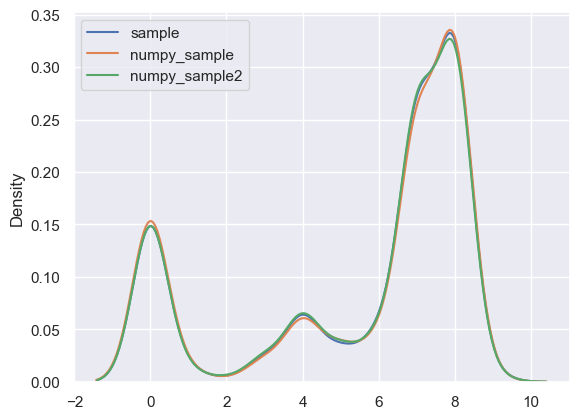

In [179]:
sns.kdeplot(data=data1,  label='sample')
sns.kdeplot(data=data2,  label='numpy_sample')
sns.kdeplot(data=data3,  label='numpy_sample2')
plt.legend()
plt.show()

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [180]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

2040

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

In [181]:
import timeit 

In [182]:
def walk_np(n: int) -> int:
    return np.sum(np.random.choice([-3, -1, 0, 2, 3], size=n))

walk_np(10_000)

1854

In [183]:
print("Function walk: ", timeit.timeit('walk(10000)', globals=globals(), number=1000))
print("Function walk_np: ", timeit.timeit('walk_np(10000)', globals=globals(), number=1000))

Function walk:  4.452317166986177
Function walk_np:  0.1722837499983143


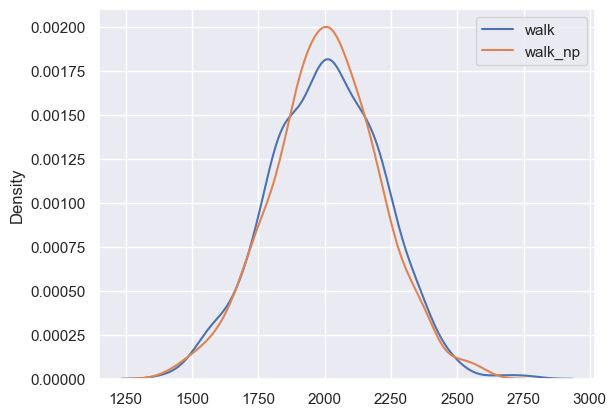

In [184]:
walk_values = [walk(10000) for _ in range(1000)]
walk_np_values = [walk_np(10000) for _ in range(1000)]
sns.kdeplot(walk_values, label='walk')
sns.kdeplot(walk_np_values, label='walk_np')
plt.legend()
plt.show()


In [185]:
%timeit walk(100000)

44.9 ms ± 403 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [186]:
%timeit walk_np(100000)

1.55 ms ± 20.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [187]:
4.45*1000/168, 44/1.52

(26.488095238095237, 28.94736842105263)

Производительность увеличилась в несколько (~26-29) раз. 

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [188]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


0.785689822647394

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [189]:
from numba import njit

strange_conv_numba = njit(strange_conv)

a = np.random.random((10000, 10000))
strange_conv_numba(a)

0.7798722475312345

In [190]:
import cython

In [191]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [192]:
%%cython

cimport numpy

def strange_conv_cython(numpy.ndarray['double', ndim=2] a):
    cdef int x = a.shape[0]
    cdef int y = a.shape[1]

    cdef double t = 1.
    cdef double c = 0.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


In [193]:
%timeit strange_conv(a)

12.8 s ± 541 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [194]:
%timeit strange_conv_numba(a)

28.6 ms ± 108 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [195]:
%timeit strange_conv_cython(a)

42.5 ms ± 41.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Производительность с помощью Numba улучшается в ~438 раз, производительность с Cython больше в 293 раз

In [196]:
print(12.4*1000/28.3,12.4*1000/42.3)

438.1625441696113 293.1442080378251
